##First things First

When starting to work on a project in Python, we usually import a number of libraries.  Some of the standard libraries that are imported are numpy, pandas, sklearn, matplotlib, seaborn (which you will need to pip install even with the installation of anaconda), and many others.  We will get an introduction to those within this meetup. The importing of seaborn makes your plots *prettier*, but it is not necessary to run any of the code below.  The line **%matplotlib inline** allows us to see our plots directly within our notebook.

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as sm_o
import seaborn as sb
import pylab 
import numpy as np
import scipy.stats as stats 
from sklearn import datasets
%matplotlib inline

Once we have imported our libraries, we might import a dataset from our local or some other source, which we might do using **pd.read_csv()**.  For the purpose of this example, we will use a built in dataset from sklearn known as the boston dataset.  We can set up this dataset in python in the following way:

In [129]:
boston = pd.DataFrame(datasets.load_boston()['data'])
boston.columns = datasets.load_boston()['feature_names']
boston_target = datasets.load_boston()['target']
#datasets.load_boston()['DESCR']

Here, the first line creates the boston dataset, which we look at down below.  In the second line, we are naming the columns correctly.  The third line shows the response variable that we want to predict (this is commonly called the target), so I have named it as **boston_target**.  We have also commented out a way to look at a description of the dataset.  In this dataset, we are attempting to use a number of different variables to better understand the median house price in different areas of Boston.  There are 13 predictor variables to assist in making our predictions, and we have 506 different homes.  We can take a look at the dataset in a number of ways:

In [130]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [131]:
boston.shape

(506, 13)

We can also get some (informative?) plots about our data using pandas, matplotlib, and/or seaborn packages.  You can see some examples from http://stanford.edu/~mwaskom/software/seaborn/examples/index.html, http://matplotlib.org/users/pyplot_tutorial.html, and http://www.analyticsvidhya.com/blog/2014/08/baby-steps-python-performing-exploratory-analysis-python/ for examples within each.  We could look at some basic summary statistics before looking into some plots.

In [132]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


We can also see if any of our columns have null values.  We can check the NAs for each column through using a **for loop**.  First, we create an empty list, *y*.  We then append the proportion of missing values for each column to the list.  Below, we can see that for this particular dataset, each column has an average of 0 null values.

In [133]:
y = []
for i in range(len(boston.columns)):
    y.append(pd.isnull(boston.iloc[:,i]).mean())
y

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Now for some basic plotting.  I will do a few plots to show basic syntax.  The rest we will leave for you to explore either this dataset or another dataset. 

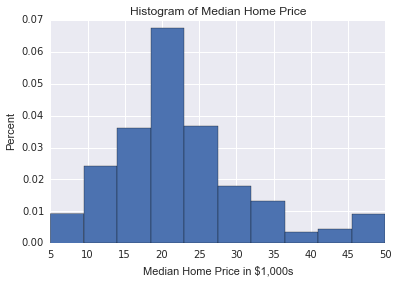

In [134]:
plt.hist(boston_target, normed=True); #The semicolon removes some unwanted text here - matplotlib
plt.xlabel('Median Home Price in $1,000s');
plt.ylabel('Percent');
plt.title('Histogram of Median Home Price');

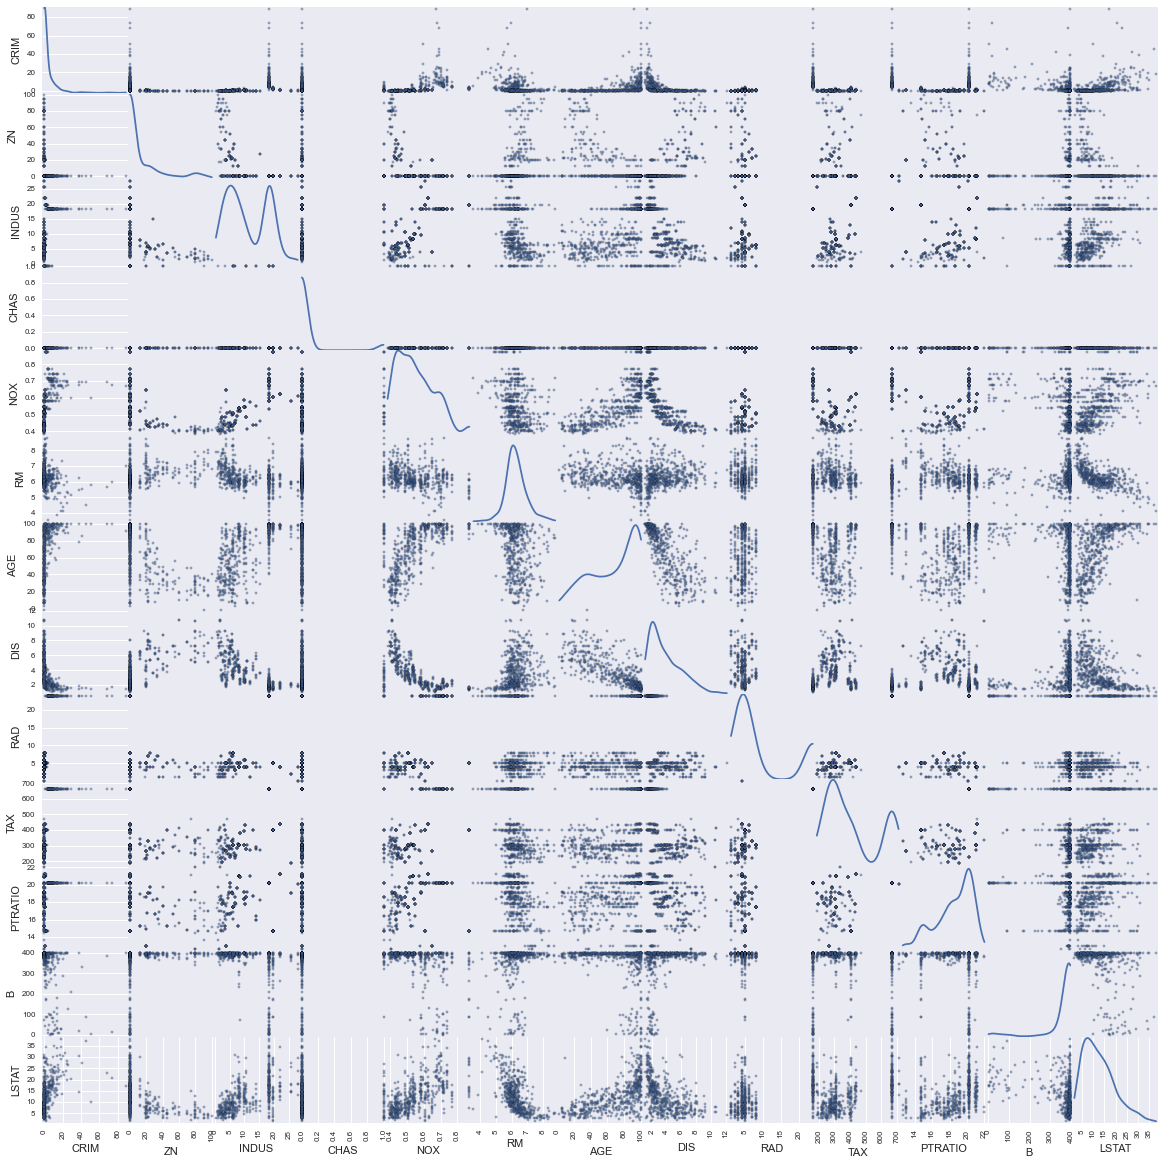

In [142]:
pd.scatter_matrix(boston, figsize=(20,20), diagonal = 'kde');

In [207]:
np.round(boston.corr(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.20,0.40,-0.06,0.42,-0.22,0.35,-0.38,0.62,0.58,0.29,-0.38,0.45
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41
INDUS,0.40,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50
RAD,0.62,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54


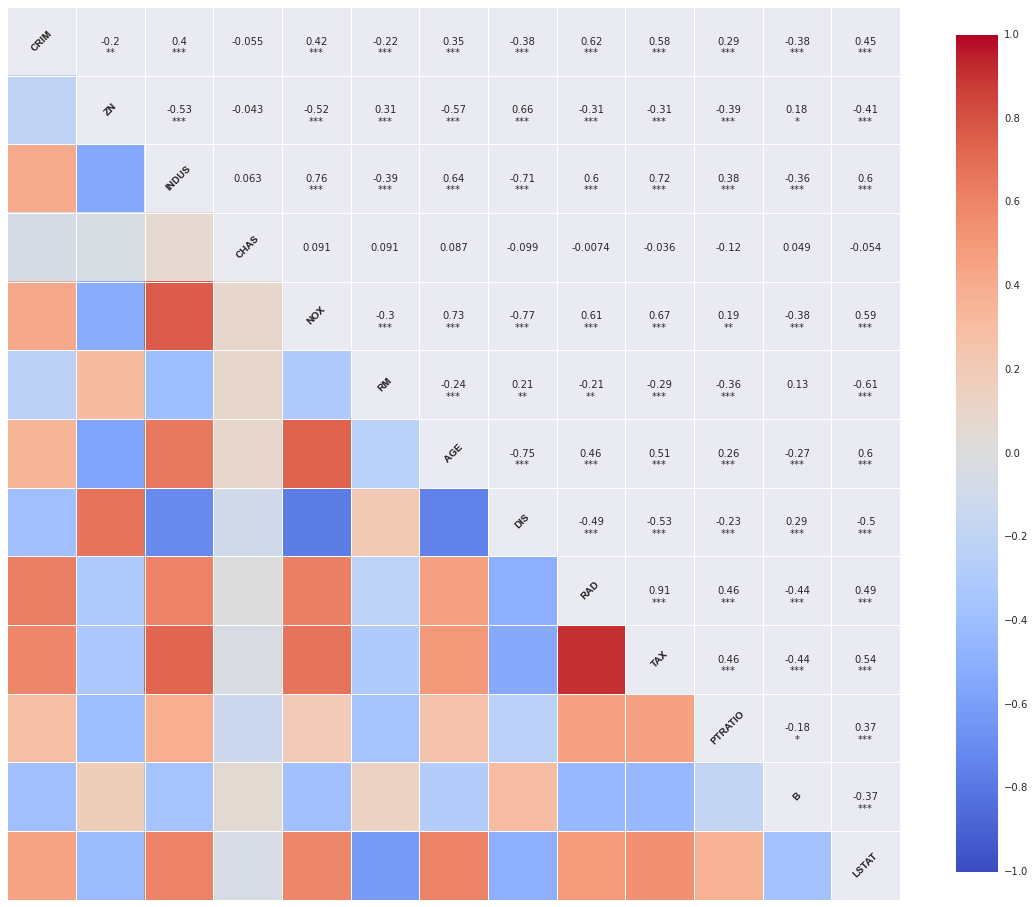

In [214]:
plt.figure(figsize=(20,20))
sb.corrplot(boston);

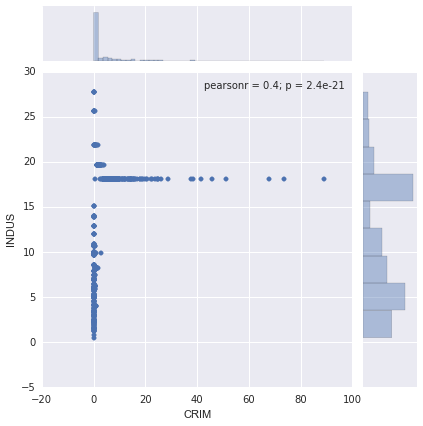

In [217]:
sb.jointplot(boston['CRIM'], boston['INDUS']);

In the above plot, INDUS is the proportion of non-retail business acres per town.  We can see that
there seems to be a large proportion of these around 18%, where they crime rate changes
darastically.  However, for most of the data, we see crime close to 0 regardless of the non-retail
business acres proportion.  In a 'real world' situation, I would be interested in looking closer into the cases where the INDUS variable is taking on values in that range.

In [143]:
boston.query('INDUS < 19 and INDUS > 16').head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
356,8.98296,0,18.1,1,0.77,6.212,97.4,2.1222,24,666,20.2,377.73,17.60
357,3.84970,0,18.1,1,0.77,6.395,91.0,2.5052,24,666,20.2,391.34,13.27
358,5.20177,0,18.1,1,0.77,6.127,83.4,2.7227,24,666,20.2,395.43,11.48
359,4.26131,0,18.1,0,0.77,6.112,81.3,2.5091,24,666,20.2,390.74,12.67
360,4.54192,0,18.1,0,0.77,6.398,88.0,2.5182,24,666,20.2,374.56,7.79


It looks as though they are all equal to 18.1, and that they have identical columns of RAD, TAX, and PTRATIO as well.  Perhaps this was a default to the dataset?  In practice, I would take a closer look at this observations to see what is going on here.  Perhaps talk with the individuals in charge of data collection.

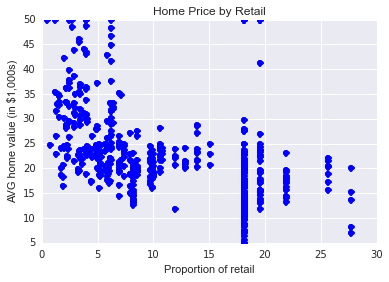

In [144]:
plt.plot(boston['INDUS'], boston_target, 'ro', c='blue');
plt.xlabel('Proportion of retail');
plt.ylabel('AVG home value (in $1,000s)');
plt.title('Home Price by Retail');

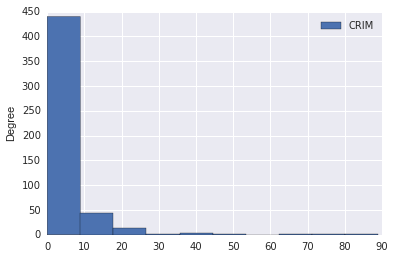

In [231]:
boston[['CRIM']].plot(kind='hist');

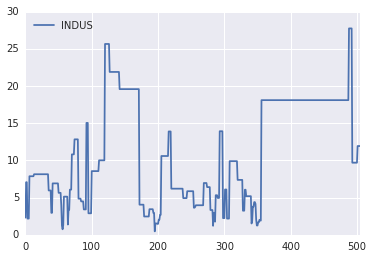

In [242]:
boston[['INDUS']].plot(kind='line');

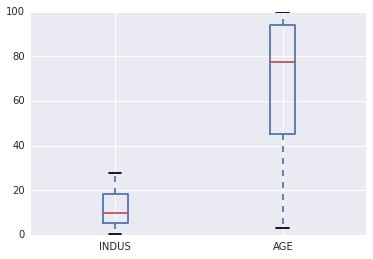

In [243]:
boston[['INDUS','AGE']].plot(kind='box')

This has been just a basic introduction of some of the plotting that you can do with matplotlib, pandas, and seaborn - there is so much more you can do!

##Plotting is a part of the Exploratory Data Analysis (EDA). EDA is a major component of any data analysis procedure and it is very important to get to know your data before you start using any mathematical/statistical model.  

Let's consider that we have done much more EDA, and assume we are now ready to consider some sort of mathematical model to help us with predicting the home value price based on the variables of interest.  We can do this using statsmodels.  It is worth noting that sklearn also has a library for linear models - a reason for using statsmodels is because of the output that we obtain by using stats models. Within statsmodels, there is a function called OLS, which stands for ordinary least squares. The name comes from the fact that we are working to minimize the sums of square distances from our observation to the predicted value given by a linear model.

The standard form of a linear model is:

$\mu_y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots$

where $\mu_y$ is the average response value for a given set of x-variables.



In [156]:
linear_model = sm.OLS(boston_target, boston).fit()

In [157]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Thu, 05 Nov 2015   Prob (F-statistic):               0.00
Time:                        12:55:17   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.008        -0.159    -0.024
ZN             0.0487      0.014      3.379      0.001         0.020     0.077
INDUS         -0.0038      0.064     -0.059      0.953        -0.130     0.123
CHAS           2.8564      0.904      3.160      0.002         1.080     4.633
NOX           -2.8808      3.359     -0.858      0.392        -9.481     3.720
RM             5.9252      0.309     19.168      0.000         5.318     6.533
AGE           -0.0072      0.014     -0.523      0.601        -0.034     0.020
DIS           -0.9680      0.196     -4.947      0.000        -1.352    -0.584
RAD            0.1704      0.067      2.554      0.011         0.039     0.302
TAX           -0.0094      0.004     -2.393      0.017        -0.017    -0.002
PTRATIO       -0.3924      0.110     -3.571      0.000        -0.608    -0.177
B              0.0150      0.003      5.561      0.000         0.010     0.020
LSTAT         -0.4170      0.051     -8.214      0.000        -0.517    -0.317
==============================================================================
Omnibus:                      204.050   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.527
Skew:                           1.609   Prob(JB):                    9.11e-299
Kurtosis:                      10.399   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From here we can see the importance of each variable for predicting the response by looking at the pvalues or confidence intervals for each variable.  Note, that with large datasets, looking at pvalues tends not to be that informative because most times all of our variables will seem important simply because we have so much data that our standard errors are reduced to the extent that all variables seem important.  We can see from our Rsquared value, we seem to be fitting the data very well in this case.  However, we want to be careful not to overfit.

Additional information we might check in this case is our assumptions of our linear model.  In multiple linear regression we have 5 assumptions:

* Linear Model is Appropriate (Checked with residuals vs. predicted response)
* Constant Variance (Checked with residuals vs. predicted response)
* Independence (Based on the nature of the data)
* Normality of Residuals (checked with normal quantile plot)
* No Multicollinearity (Checked using VIFs - correlation matrix)



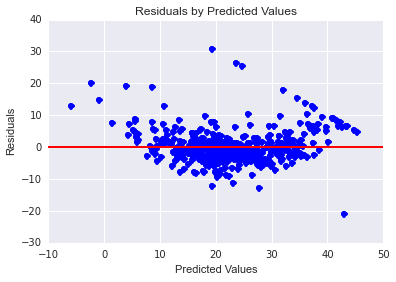

In [179]:
plt.plot(linear_model.predict(boston), linear_model.resid, 'ro', c='blue');
plt.axhline(y=0, xmin=-10, xmax=50, linewidth=2, color = 'red');
plt.title('Residuals by Predicted Values');
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');

In the aboe plot, I do not see major concerns with the linear model assumption.  However, it does appear that there is some curvature to the plot.  Therefore, the linear model assumption does not appear to be met.  Looking closer at the EDA, we might be able to see exactly how we might add an additional variable that assists in reducing this pattern. 

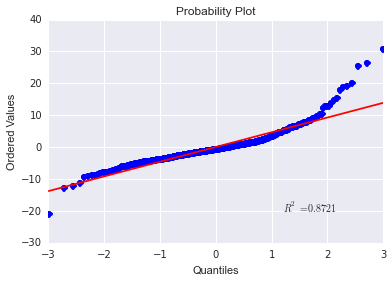

In [168]:
stats.probplot(linear_model.resid, dist="norm", plot=pylab);

In the normal quantile plot above, we would like to see that our residuals follow the red reference line.  It appears that the upper tail is a little bit heavier than a normal distribution, but in practice I might still consider with the assumpution of normality being met.  Common technniques are to transform the response using a log() to better approximate the distribution as a linear combination of predictors.  

Some of the variables are very correlated - as we saw above - this can be very detrimental to our ability to predict in our model.  Below I have expressed the VIFs for each variable in our model.  Notice that may of them are much larger than 10!  What does this mean?  What should we do about it!?

In [201]:
vif=[]
for i in range(boston.shape[1]):
               vif.append(sm_o.variance_inflation_factor(boston.values, i))

In [203]:
print np.round(vif,2)

[  2.07   2.84  14.48   1.15  73.9   77.93  21.39  14.7   15.15  61.23
  85.03  20.07  11.09]


##YOUR TURN

* Look at more plots!  See what you can create.  Use pandas, matplotlib and seaborn to create some additional plots!


* Use boston.groupby(), pd.crosstab() to try and look at different summaries of your data 


* Within sklearn we can split our dataset into a training and test set: http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html.  Why would we want to split our dataset?  


* With our split data try estimating the MSE on your test set.  Try performing linear regression using your model with different predictors. Which models seem to be doing the best?